# Some coding tips for `python` and relevant packages

In this short notebook, I will go through a few basic examples in `python` that might be useful for the course.

These are just some of the basic things that can be useful and should not be regarded as a comprehensive tutorial. For more reference some other references should be reffered to. Feel free to search around for others.

`python` unlike `R` is an object-oriented language. Although it is flexible enough to suport virtually any programming approach.

## Functions

You might get tired of always typing http://stats191.stanford.edu/data.
You could make a small function

In [1]:
def useful_function(filename):
    return r"http://stats191.stanford.edu/data/"+filename

useful_function("groundhog.table")

'http://stats191.stanford.edu/data/groundhog.table'

In contrast to `R`, `python` does not have a built-in `DataFrame` data type. Luckily there is [`pandas`](https://pandas.pydata.org/) library with the corresponding functionality.  
Let's load the heights data using the `useful_function` into a `Dataframe`.

In [2]:
import pandas as pd
df = pd.read_table(useful_function("groundhog.table"),sep=',' )
df.head()

,year,mintemp,shadow
0,1990,24,N
1,1991,23,Y
2,1992,22,Y
3,1993,16,Y
4,1994,12,Y


Or, for all data sets in the course directory, we might try

In [3]:
def course_dataset(filename,sep=','):
    df = pd.read_table(useful_function(filename), sep = sep )
    return df

course_dataset('groundhog.table', sep=',').head()

,year,mintemp,shadow
0,1990,24,N
1,1991,23,Y
2,1992,22,Y
3,1993,16,Y
4,1994,12,Y


## Source

When working on a particular project or assignment, it is often easiest to type commands in a text editor and rerun them several times. The command *source* is an easy way to do this, and it takes either the name of a file or a URL as argument. 
Suppose we have a webpage http://stats191.stanford.edu/R/helper_code.R

Then, we can execute this as follows

In [4]:
# analog in python??? source("http://stats191.stanford.edu/R/helper_code.R")
course_dataset("groundhog.table", sep=',').head()

,year,mintemp,shadow
0,1990,24,N
1,1991,23,Y
2,1992,22,Y
3,1993,16,Y
4,1994,12,Y


As you go through the course, you might copy this file to a your computer
and add some other useful functions
to this file. 

For larger collections of functions, `python` allows the creation of modules and/or packages that can be 
installed and loaded using `import` statement ot `imp` module. For more reference official [documentation](http://python.org) or any other ressource should be refferred to.

## Concatenation, sequences

Many tasks involving sequences of numbers.  Here are some basic examples on how to manipulate and create sequences.

The basic sequence types in `python` are `list` and `typle`. Although, `numpy` implements an [`ndarray`](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html) object that provides more functionality for scientific calculations than native sequence types.

In [35]:
import numpy as np
X = 3
Y = 4

a = np.array([X,Y])
print(f'array {a}')
print(type(a))

array [3 4]
<class 'numpy.ndarray'>


To repeat values `tile` or `repeat` functions can be used.

In [49]:
print(np.tile(1,2))
print(np.repeat(3,4))

print(np.tile([1,2],3))
print(np.repeat([4,5],6))

[1 1]
[3 3 3 3]
[1 2 1 2 1 2]
[4 4 4 4 4 4 5 5 5 5 5 5]


Another commonly used function to create an `ndarray` is [`arange`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.arange.html). Some examples are below:

In [50]:
np.arange( 11 )

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [51]:
np.arange( 0,11,2 )

array([ 0,  2,  4,  6,  8, 10])

One can sort and order sequences

In [64]:
X = np.array([9,6,4,2])
X.sort()
print(X)

[2 4 6 9]


Reorderintg by indices is possible.

In [69]:
X = np.array([9,6,4,2])
o = [3,0,2,1]
print(X[o])

[2 9 4 6]


A word of caution. In `python` you can overwrite builtin functions so that try not to call variables `list`:

In [ ]:
#do not do this
list=[1,2,3,4]

Feel free to familiarize yourself with `python`, `numpy`, `pandas`, `statsmodels`, `matplotlib` and `seaborn`. You don't need to go into too much depth but some basics would be useful to get you going.

## Indexing

Often, we will want to extract a subset of rows (or columns) of a vector (or matrix).`numpy` and `pandas` support logical indexing. Although, for native python lists list comprehensions are needed. 

In [33]:
import numpy as np
X = np.array([4,5, 3,6,7,9])
Y = np.array([4,2,65,3,5,9])
X[Y>=5]

array([3, 7, 9])

Suppose we have a `pandas` `DataFrame` and want to extract from rows or columns. Rows are the first of two indexing objects while columns correspond to the second indexing object. Suppose we want to find and take the mother and daughter heights where the daughter's height is less than or equal to 62 inches.

Note the "," in the square brackets below: this tells `R` that it is looking for a subset of *rows* of the `data.frame`.

In [86]:
import pandas as pd

heights=pd.read_table(r'.\data\01_heights.csv',sep=',',index_col=0)
subset_heights = heights[heights.Dheight <= 62]
subset_heights.head()

print(f'size original {heights.shape}\nsize <= 62 {subset_heights.shape}')

size original (1375, 2)
size <= 62 (354, 2)


## Plotting

`matplotlib` is an extensive plotting library. `matplotlib` is a back-end of `pandas.plot` and `seaborn` library.

Most of our plots will be fairly straightforward, "scatter plots".

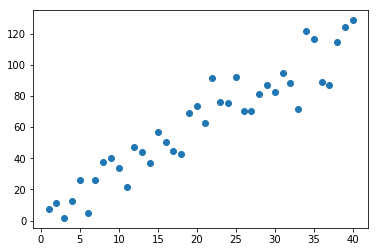

In [131]:
import scipy as sp
import matplotlib.pyplot as plt

X = np.arange(1,41)
Y = 2 + 3 * X + sp.stats.norm.rvs(size=40) * 10

plt.scatter(X, Y)
plt.show()

The plots can be made nicer by adding colors and using different symbols.

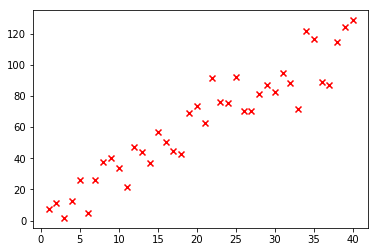

In [132]:
plt.scatter(X, Y,marker='x',color='red')
plt.show()

You can add titles, as well as change the axis labels.

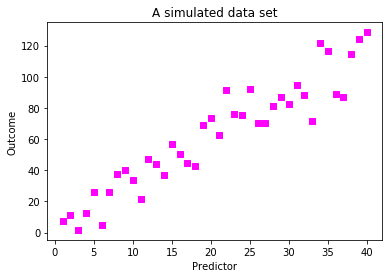

In [133]:
fig, ax = plt.subplots(1)
ax.scatter(X, Y, color='magenta', marker='s')

ax.set_xlabel('Predictor')
ax.set_ylabel('Outcome')
ax.set_title('A simulated data set')
plt.show()

Arbitrary lines are added with `plt.plot`. Horizontal and parallel lines are added by `axhline` and `axvline`, respectively.

We'll add some lines to our previous plot: a yellow dashed line with intercept 2, slope 3, width 3 as well as a vertical line at x=20 and horizontal line at y=60.

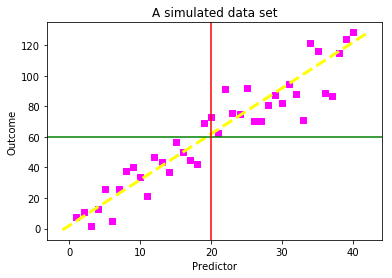

In [141]:
fig, ax = plt.subplots(1)
ax.scatter(X, Y, color='magenta', marker='s')

Xl=np.array(ax.get_xlim())
Yl=3*Xl+2
ax.plot(Xl,Yl,linestyle='--',color='yellow',linewidth=3)

ax.axhline(60,color='green')
ax.axvline(20,color='red')

ax.set_xlabel('Predictor')
ax.set_ylabel('Outcome')
ax.set_title('A simulated data set')
plt.show()

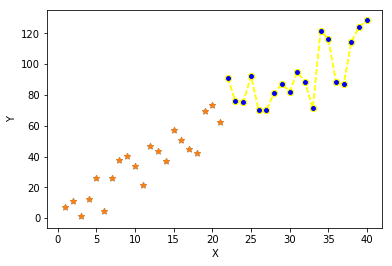

In [153]:
plt.scatter(X[0:21], Y[0:21],marker='*' )
plt.plot(X[21:41], Y[21:41], color='yellow',linestyle='--',marker='o',markerfacecolor='blue') 
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('Y')
plt.show()

You can creare a figure with multiple subplots. Below we create a 2-by-1 grid of plots.

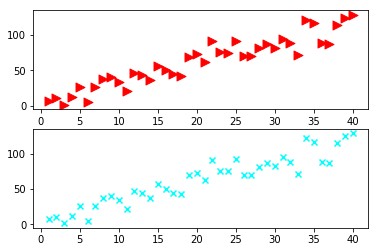

In [162]:
fig, (ax1,ax2) = plt.subplots(2)

ax1.scatter(X, Y, color='red', marker='>', s=80)
ax2.scatter(X, Y, color='cyan', marker='x')

plt.show()

## Saving plots

Plots can be saved as *pdf*, *svg*, *png*, *jpg* among other formats. Let's save a plot in a file called "myplot.png"

In [163]:
plt.scatter(X, Y)
plt.gcf().savefig('myplot.png')

Several plots can be saved using pdf files. This example has two plots in it.

In [165]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')

fig, ax = plt.subplots(1)
ax.scatter(X, Y, color='red', marker='>', s=80)
fig.savefig(pp, format='pdf')

fig, ax = plt.subplots(1)
ax.scatter(X, Y, color='cyan', marker='x')
fig.savefig(pp, format='pdf')

pp.close()

## Loops

It is easy to use *for* loops in `python`.

In [168]:
for i in range(11):
    print(i**2)

0
1
4
9
16
25
36
49
64
81
100


In [169]:
for w in ['red', 'blue', 'green']:
    print(w)

red
blue
green


Note that big loops can get really slow if you have to do something with in every iteration. Vectorized operations on `numpy.ndarrays` are usually faster.

## Help

`python` has a builtin documentation and examples be accessed via `__doc__` attribute

In [172]:
print(np.arange.__doc__)

arange([start,] stop[, step,], dtype=None)

    Return evenly spaced values within a given interval.

    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.

    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.

    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off affects the length of `out`.
    step : number, optional
        

In addition to that, a quick web search will answer most of the basic quaestions.

## Distributions in R

In practice, we will often be using the distribution (CDF), quantile (inverse CDF) of standard random variables like the *T*, *F*, chi-squared and normal.

The standard 1.96 (about 2) standard deviation rule for $\alpha=0.05$: (note that 1-0.05/2=0.975)

In [174]:
import scipy as sp

sp.stats.norm.ppf(0.975)

1.959963984540054

We might want the $\alpha=0.05$ upper quantile for an F with 2,40 degrees of freedom:

In [179]:
sp.stats.f.ppf(0.95,2,40)

3.2317269928308443

So, any observed F greater than 3.23 will get rejected at the α=0.05 level. Alternatively, we might have observed an F of 5 with 2, 40 degrees of freedom, and want the p-value

In [180]:
1 - sp.stats.f.cdf(5, 2, 40)

0.011529215046068519

Let's compare this p-value with a chi-squared with 2 degrees of freedom, which is like an F with infinite degrees of freedom in the denominator (send 40 to infinity). We also should multiply the 5 by 2 because it's divided by 2 (numerator degrees of freedom) in the F.

In [181]:
[ 1-sp.stats.chi2.cdf(5*2,2), 1 - sp.stats.f.cdf(5, 2, 4000) ]

[0.0067379469990854757, 0.0067801205485061855]

## Other references

In this notebook the very tip of the `numpy`/`scipy` and `matplotlib` icebergs were touched. There is a plethora of ressoures on `python`, `numpy`/`scipy`, `pandas` and `matplotlib`. `statmodels` and `seaborn` that were not used in this notebook are slightly less common but have good documentation and examples. Anyways all code snipsets are there ;)